# YouTube Daily Treding Videos Analysis

* We analysis about Youtube daily trending videos data.

## Contents
1. [Load Data & Import Libraries](#1.-Load-Data-&-Import-Libraries)
2. [Explore Dataset](#2.-Explore-Dataset)
3. [Data Preprocessing](#3.-Data-Preprocessing)
4. [Data Visualize](#4.-Data-Visualize)
    * [Views count by likes and dislikes ratio](#Views-count-by-likes-and-dislikes-ratio)  
    * [View Count by Category](#View-Count-by-Category)
    * [Like/dislike Ratio by Category](#Like/dislike-Ratio-by-Category)
    * [Viewer Engagement Score by Category](#Viewer-Engagement-Score-by-Category)
    * [Trending Video Counts by Category](#Trending-Video-Counts-by-Category)
5. [Conclusion](#5.-Conclusion)

## 1. Load Data & Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os, re
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-trending-video-dataset/MX_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/GB_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/BR_category_id.json
/kaggle/input/youtube-trending-video-dataset/FR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/MX_category_id.json
/kaggle/input/youtube-trending-video-dataset/GB_category_id.json
/kaggle/input/youtube-trending-video-dataset/US_category_id.json
/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_category_id.json
/kaggle/input/youtube-trending-video-dataset/KR_category_id.json
/kaggle/input/youtube-trending-video-dataset/DE_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_category_id.json
/kaggle/input/youtube-trend

* 카테고리별 평균 좋싫비/시청수/코멘트
* 가장 인기있는 카테고리
* 가장 참여율이 좋은 카테고리
* 연도별 월별 시계열 통계

## 2. Explore Dataset

* We use Korean Treding data in this project

In [2]:
KR_data = pd.read_csv("/kaggle/input/youtube-trending-video-dataset/KR_youtube_trending_data.csv")
KR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101754 entries, 0 to 101753
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           101754 non-null  object
 1   title              101754 non-null  object
 2   publishedAt        101754 non-null  object
 3   channelId          101754 non-null  object
 4   channelTitle       101754 non-null  object
 5   categoryId         101754 non-null  int64 
 6   trending_date      101754 non-null  object
 7   tags               101754 non-null  object
 8   view_count         101754 non-null  int64 
 9   likes              101754 non-null  int64 
 10  dislikes           101754 non-null  int64 
 11  comment_count      101754 non-null  int64 
 12  thumbnail_link     101754 non-null  object
 13  comments_disabled  101754 non-null  bool  
 14  ratings_disabled   101754 non-null  bool  
 15  description        99263 non-null   object
dtypes: bool(2), int64(5)

* This dataset uploaded information about when each video became a trending video.
* Therefore, if it has become a trending video for a long time because it is very popular, it may contain duplicate information.
* An example of one such video is a song by BTS.

In [3]:
KR_data[KR_data["view_count"] >= 200000000][["video_id", "title", "publishedAt", "trending_date"]]

,video_id,title,publishedAt,trending_date
1782,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,2020-08-25T00:00:00Z
1917,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,2020-08-26T00:00:00Z
2069,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,2020-08-27T00:00:00Z
2256,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,2020-08-28T00:00:00Z
2424,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,2020-08-29T00:00:00Z
2579,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,2020-08-30T00:00:00Z
2733,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,2020-08-31T00:00:00Z
53216,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,2021-05-30T00:00:00Z
53438,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,2021-05-31T00:00:00Z
53668,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,2021-05-31T00:00:00Z


* Also, there are 0 view count videos, amazingly!
* These are also deleted.

In [4]:
KR_data[KR_data["view_count"]==0].drop_duplicates(["video_id"])

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
24599,gNfxYzW-wME,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,2020-12-31T14:00:10Z,UCOH52Yqq4-rdLvpt2Unsqsw,YouTube Korea,24,2021-01-01T00:00:00Z,YouTube Originals|YouTube|Hello 2021 Korea|ful...,0,2052,63,627,https://i.ytimg.com/vi/gNfxYzW-wME/default.jpg,False,False,유례 없는 한 해를 함께해준 크리에이터 및 아티스트를 만나보는 유튜브 오리지널의 신...
46777,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21T11:00:14Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-22T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/hAxqygRdM4g/default.jpg,True,True,This year’s annual Earth Day Doodle highlights...


* Date data type is str, and we've organized this to make boolean indexing easier.

## 3. Data Preprocessing

In [5]:
KR_data = KR_data[KR_data["view_count"]!=0]    #delete 0 view count data

KR_year = KR_data["trending_date"].map(lambda x:x[:4])
KR_month = KR_data["trending_date"].map(lambda x:x[5:7])
KR_day = KR_data["trending_date"].map(lambda x:x[8:10])
KR_date = pd.concat([KR_year, KR_month, KR_day], axis = 1)
print(KR_date)

       trending_date trending_date trending_date
0               2020            08            12
1               2020            08            12
2               2020            08            12
3               2020            08            12
4               2020            08            12
...              ...           ...           ...
101749          2022            01            13
101750          2022            01            13
101751          2022            01            13
101752          2022            01            13
101753          2022            01            13

[101741 rows x 3 columns]


* Data has 3 years data, 2020, 2021 and 2022. 2022 data number is smaller than others.

In [6]:
KR_2020 = KR_data[KR_year=="2020"]
KR_2021 = KR_data[KR_year=="2021"]
KR_2022 = KR_data[KR_year=="2022"]

for i, data in enumerate([KR_2020, KR_2021, KR_2022]):
    print("%d year data:"%(2020+i), len(data))

2020 year data: 24555
2021 year data: 74586
2022 year data: 2600


In [7]:
# delete duplicated videos data
KR_2020_nodup = KR_2020.drop_duplicates(["video_id"])
KR_2021_nodup = KR_2021.drop_duplicates(["video_id"])
KR_2022_nodup = KR_2022.drop_duplicates(["video_id"])

* We analyzed the relationship between the like/dislike ratio and other features.
* But if video's rating is disabled, there're no information about likes/dislike.
* Also, there're some cases dislikes number is 0(maybe absence data?)
* Therefore, we cleared all such data.

In [8]:
# make new dataframe, which contain new columns data about likes/dislikes ratio
def make_ratio(data):
    ratio = data["likes"]/data["dislikes"]
    new_data = pd.concat([data,ratio],axis=1)
    # drop raings disabled videos
    new_data = new_data[new_data["ratings_disabled"] == False]
    # infinity values also considered Nan
    new_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    # drop all Nan values
    new_data = new_data.dropna()
    # set column name
    new_data.columns = data.columns.tolist() + ["ratio"]
    return new_data
    
Rating_2020 = make_ratio(KR_2020_nodup)
Rating_2021 = make_ratio(KR_2021_nodup)
Rating_2022 = make_ratio(KR_2022_nodup)
# From 2022, YouTube has changed the number of dislikes of videos so that it cannot be viewed, 
# and it is reflected in this dataset, so the like/dislike ratio cannot be calculated with the data for 2022.
Rating_2022

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,ratio


* categoryId data refers video category, but categoryId list data in this dataset is not complete.
* So we found the complete data and made it into a DataFrame.

In [9]:
category_info = """1 -  Film & Animation
2 - Autos & Vehicles
10 - Music
15 - Pets & Animals
17 - Sports
18 - Short Movies
19 - Travel & Events
20 - Gaming
21 - Videoblogging
22 - People & Blogs
23 - Comedy
24 - Entertainment
25 - News & Politics
26 - Howto & Style
27 - Education
28 - Science & Technology
29 - Nonprofits & Activism
30 - Movies
31 - Anime/Animation
32 - Action/Adventure
33 - Classics
34 - Comedy
35 - Documentary
36 - Drama
37 - Family
38 - Foreign
39 - Horror
40 - Sci-Fi/Fantasy
41 - Thriller
42 - Shorts
43 - Shows
44 - Trailers""".split("\n")

category_id = list(map(lambda x:x.replace(" ","").replace("&","\n").split("-"), category_info))
category_id = list(map(lambda x:[int(x[0]),x[1]], category_id))

KR_id = pd.DataFrame(category_id)
KR_id.set_index(keys=[0], inplace=True, drop=True)
KR_id = KR_id.sort_index()

In [10]:
# colormap setting
color = sns.color_palette("hls",15)
# figure size setting
sns.set(rc={'figure.figsize':(16,9)})

* Views count according to likes and dislikes ratio

## 4. Data Visualize

### Views count by likes and dislikes ratio

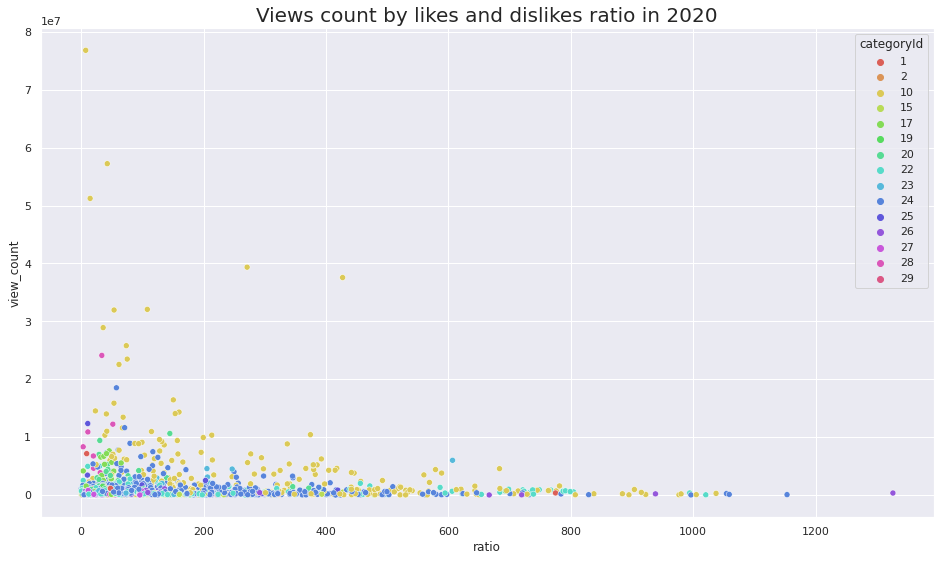

In [11]:
g = sns.scatterplot(x="ratio", y="view_count", hue="categoryId", data=Rating_2020 ,palette=color)
g.set_title("Views count by likes and dislikes ratio in 2020", size = 20, weight = True);

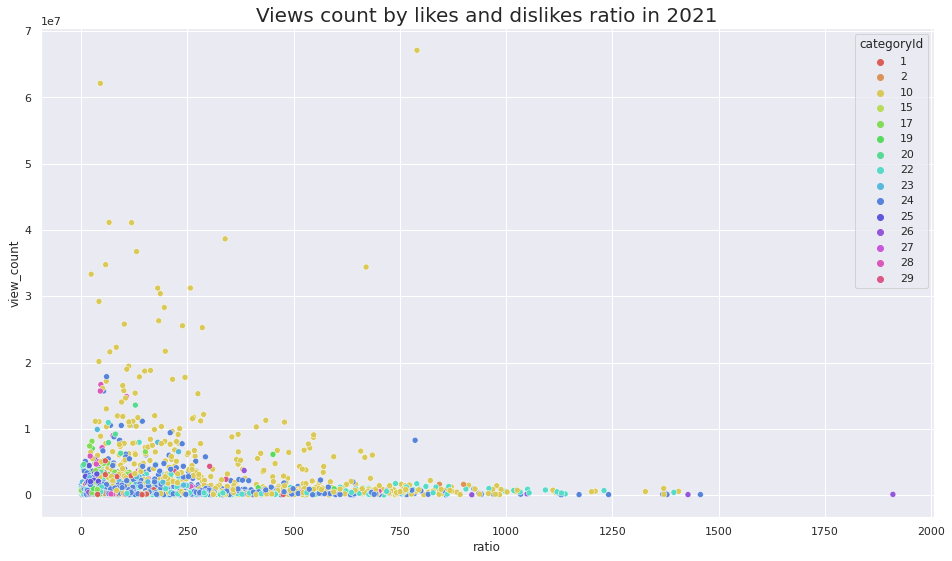

In [12]:
g = sns.scatterplot(x="ratio", y="view_count", hue="categoryId", data=Rating_2021, palette=color)
g.set_title("Views count by likes and dislikes ratio in 2021", size = 20, weight = True);

### View Count by Category

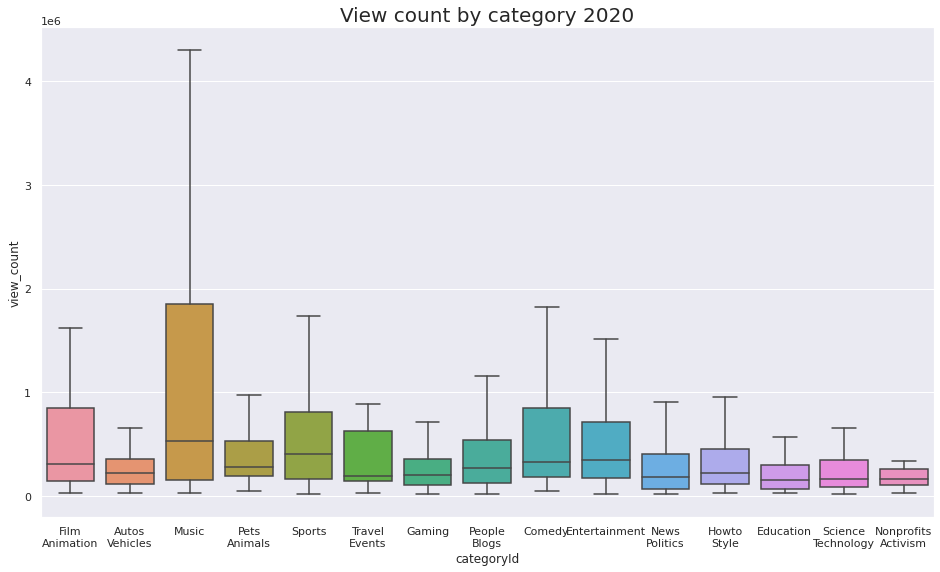

In [13]:
g = sns.boxplot(x="categoryId",y="view_count",data=KR_2020_nodup, showfliers = False)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(KR_2020_nodup["categoryId"].unique())))
g.set_xticklabels(xticks);
g.set_title("View count by category 2020", size = 20, weight = True);

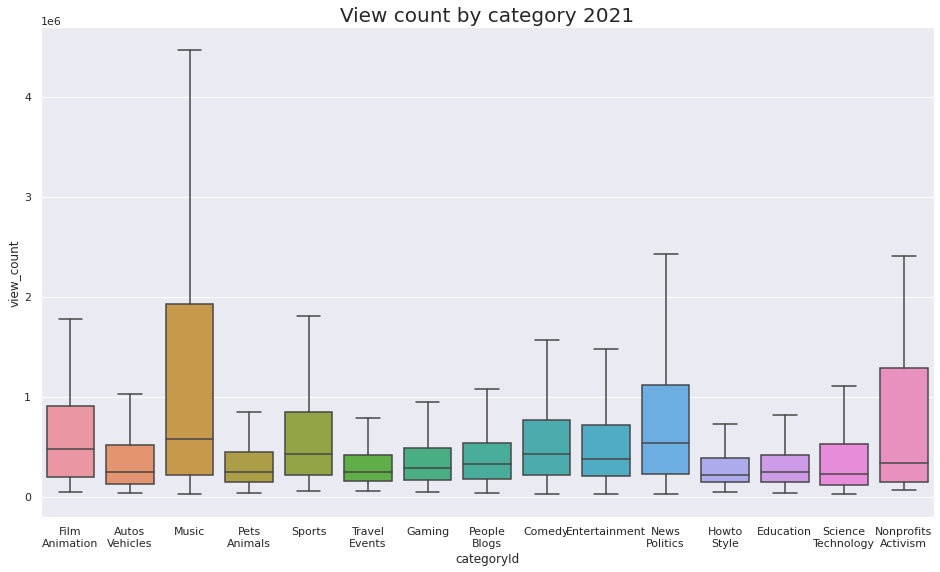

In [14]:
g = sns.boxplot(x="categoryId",y="view_count",data=KR_2021_nodup, showfliers = False)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(KR_2021_nodup["categoryId"].unique())))
g.set_xticklabels(xticks);
g.set_title("View count by category 2021", size = 20, weight = True);

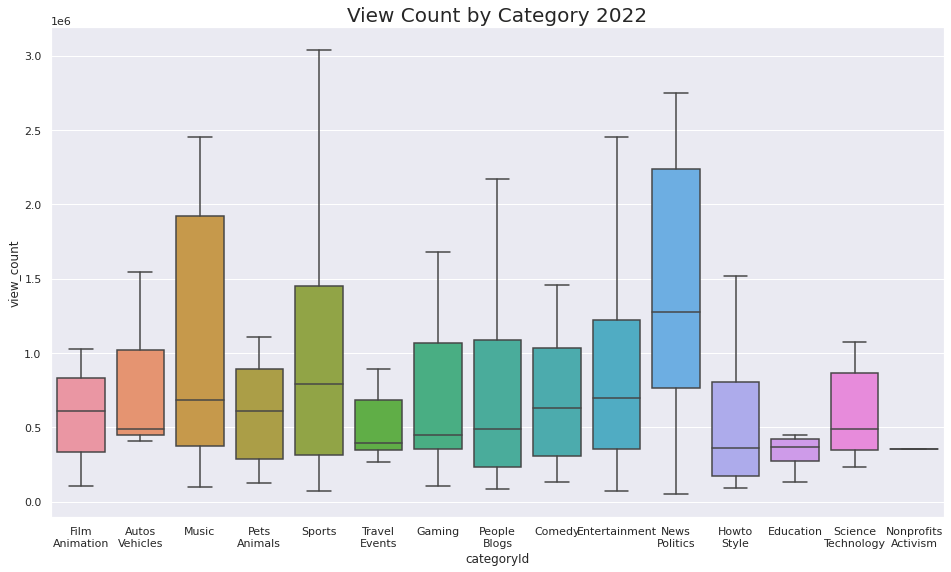

In [15]:
g = sns.boxplot(x="categoryId",y="view_count",data=KR_2022_nodup, showfliers = False)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(KR_2022_nodup["categoryId"].unique())))
g.set_xticklabels(xticks);
g.set_title("View Count by Category 2022", size = 20, weight = True);

### Like/dislike Ratio by Category

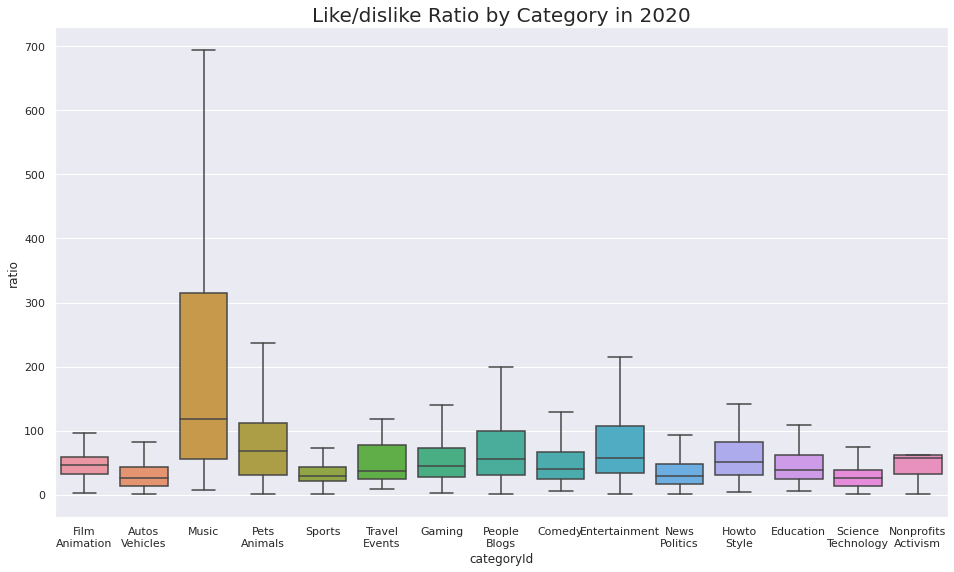

In [16]:
g = sns.boxplot(x="categoryId",y="ratio",data=Rating_2020, showfliers = False)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(KR_2020_nodup["categoryId"].unique())))
g.set_xticklabels(xticks);
g.set_title("Like/dislike Ratio by Category in 2020", size = 20, weight = True);

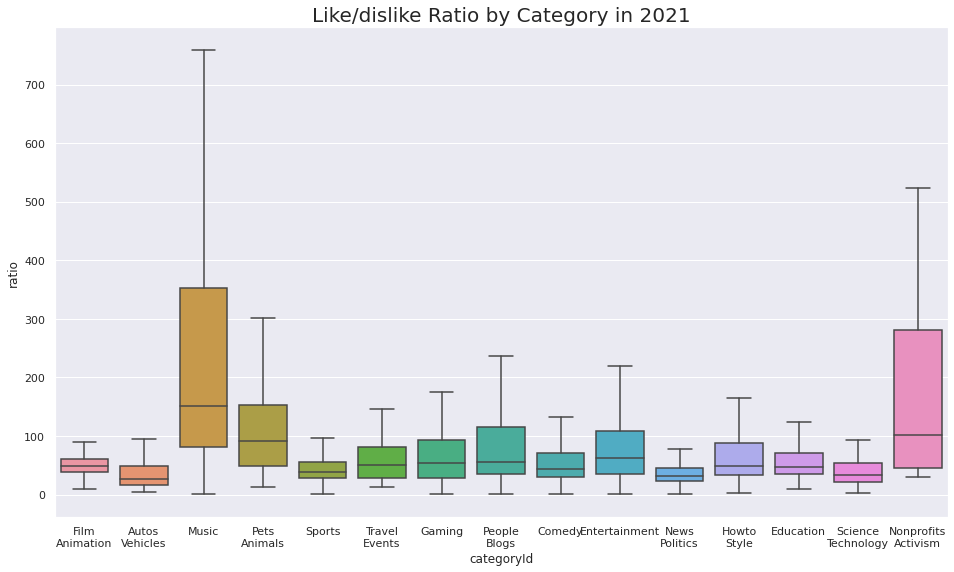

In [17]:
g = sns.boxplot(x="categoryId",y="ratio",data=Rating_2021, showfliers = False)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(KR_2021_nodup["categoryId"].unique())))
g.set_xticklabels(xticks);
g.set_title("Like/dislike Ratio by Category in 2021", size = 20, weight = True);

### Viewer Engagement Score by Category

* We setting "Viewer Engagement Score", which sum of likes, dislikes and comment per view count.

count    4370.000000
mean        0.051272
std         0.056549
min         0.000000
25%         0.016859
50%         0.029137
75%         0.059510
max         0.420676
dtype: float64


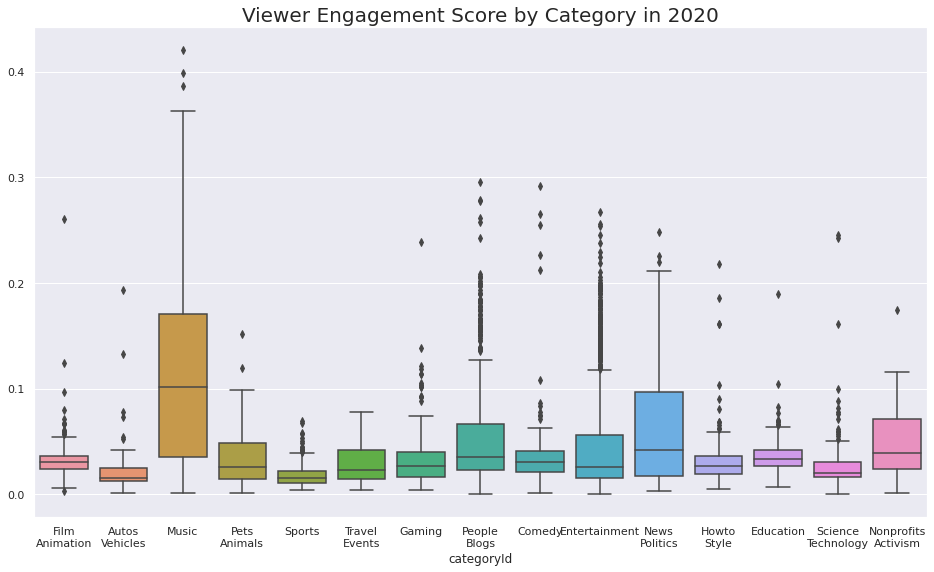

In [18]:
data = KR_2020_nodup
score = (data["likes"] + data["dislikes"] + data["comment_count"])/data["view_count"]
print(score.describe())
g = sns.boxplot(x="categoryId",y=score ,data=data)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(data["categoryId"].unique())))
g.set_xticklabels(xticks);
g.set_title("Viewer Engagement Score by Category in 2020", size = 20, weight = True);

count    8885.000000
mean        0.041775
std         0.048446
min         0.000000
25%         0.016340
50%         0.025744
75%         0.042827
max         0.400206
dtype: float64


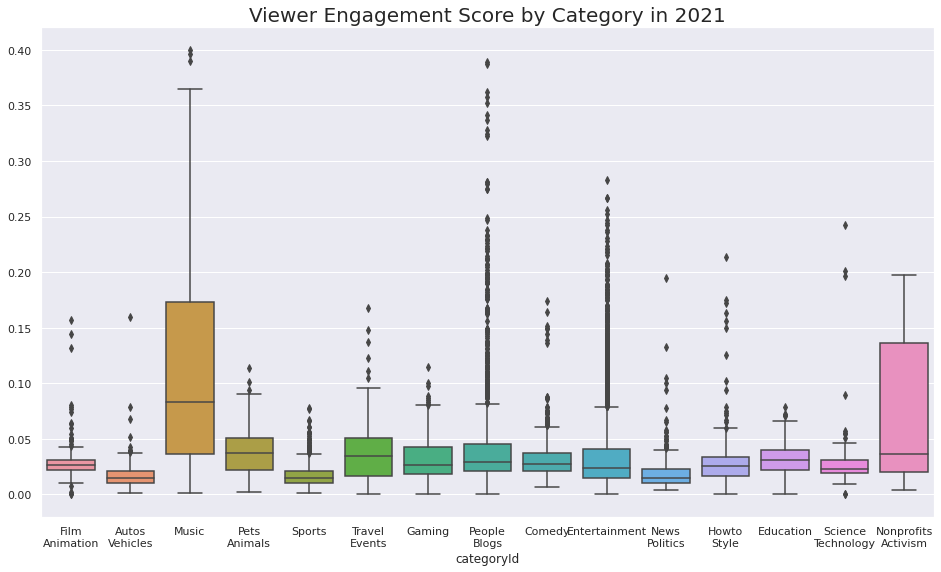

In [19]:
data = KR_2021_nodup
score = (data["likes"] + data["dislikes"] + data["comment_count"])/data["view_count"]
print(score.describe())
g = sns.boxplot(x="categoryId",y=score ,data=data)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(data["categoryId"].unique())))
g.set_xticklabels(xticks);
g.set_title("Viewer Engagement Score by Category in 2021", size = 20, weight = True);

count    458.000000
mean       0.032884
std        0.032136
min        0.000407
25%        0.014616
50%        0.024005
75%        0.037076
max        0.221348
dtype: float64


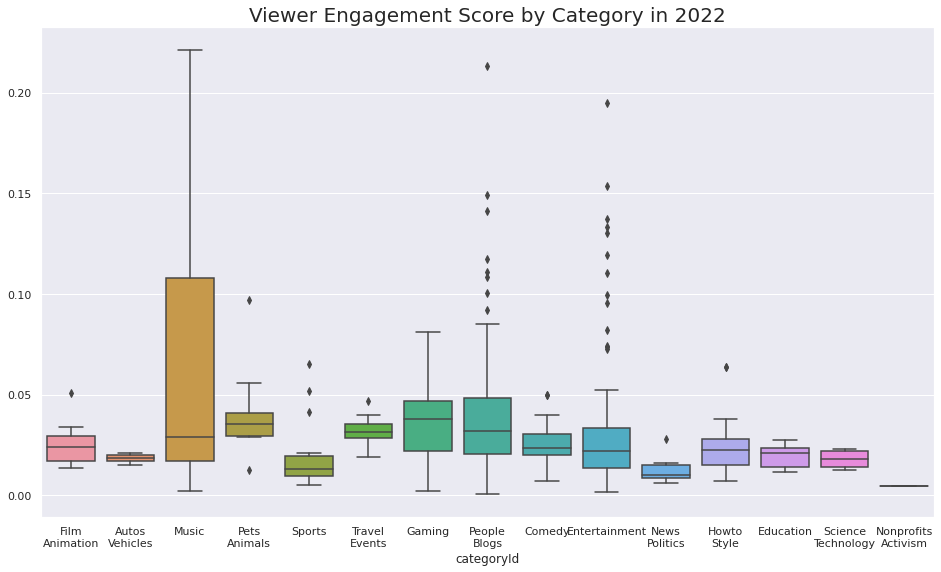

In [20]:
data = KR_2022_nodup
score = (data["likes"] + data["dislikes"] + data["comment_count"])/data["view_count"]
print(score.describe())
g = sns.boxplot(x="categoryId",y=score ,data=data)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(data["categoryId"].unique())))
g.set_xticklabels(xticks);
g.set_title("Viewer Engagement Score by Category in 2022", size = 20, weight = True);

### Trending Video Counts by Category

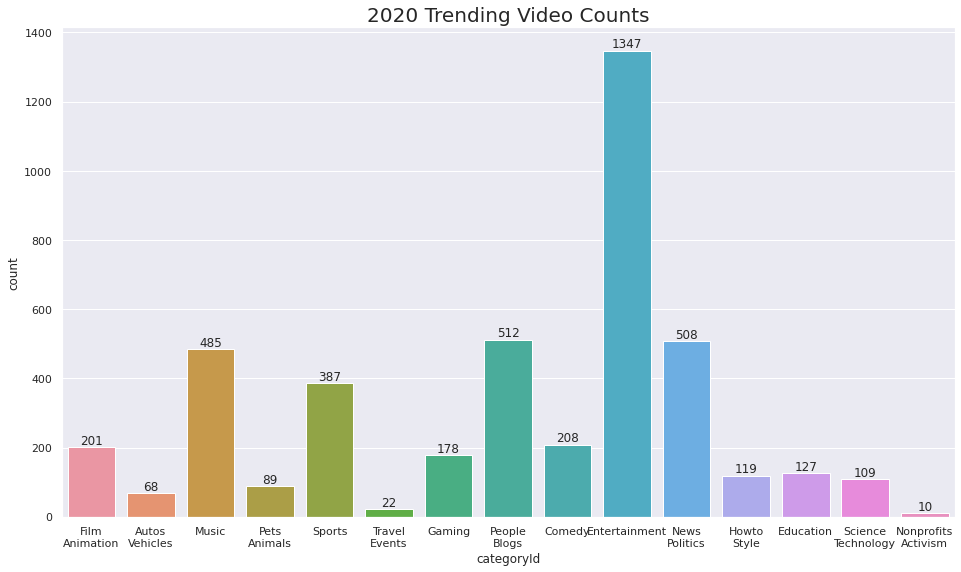

In [21]:
data = KR_2020_nodup
g = sns.countplot(x = "categoryId", data=data)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(data["categoryId"].unique())))
g.set_xticklabels(xticks);

ncount = len(data)
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate(int(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
g.set_title("%s Trending Video Counts"%(data["trending_date"].iloc[0][:4]), fontsize=20, weight=True);

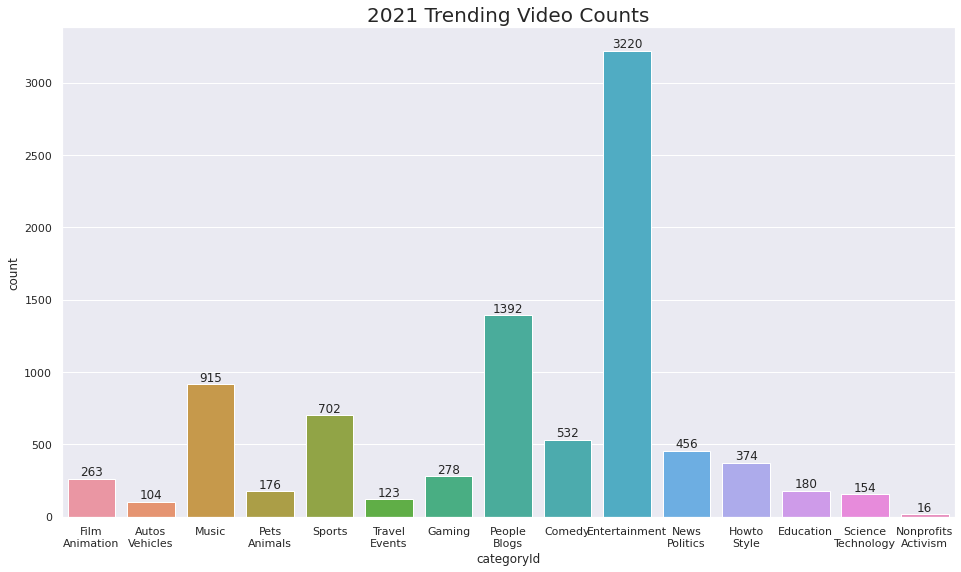

In [22]:
data = KR_2021_nodup
g = sns.countplot(x = "categoryId", data=data)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(data["categoryId"].unique())))
g.set_xticklabels(xticks);

ncount = len(data)
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate(int(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
g.set_title("%s Trending Video Counts"%(data["trending_date"].iloc[0][:4]), fontsize=20, weight=True);

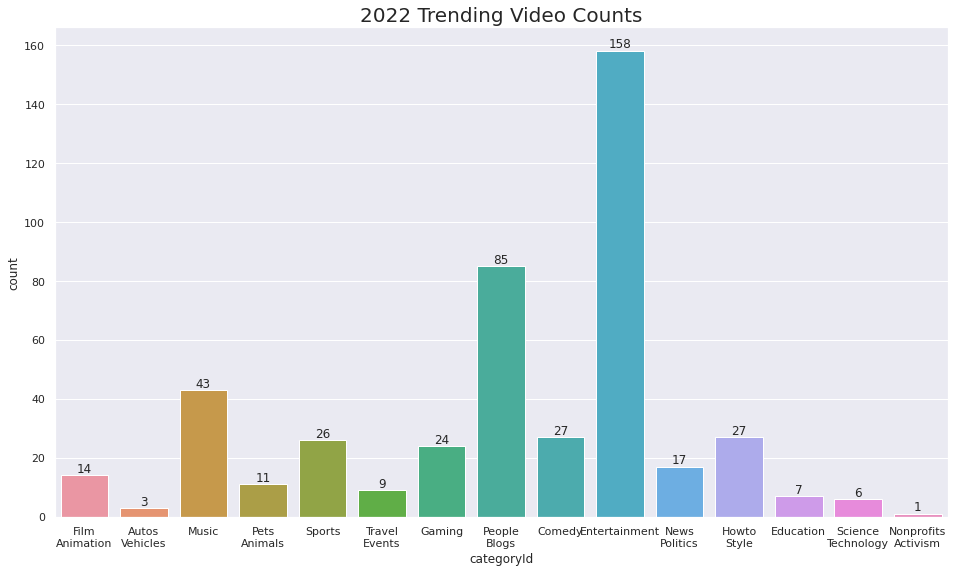

In [23]:
data = KR_2022_nodup
g = sns.countplot(x = "categoryId", data=data)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(data["categoryId"].unique())))
g.set_xticklabels(xticks);

ncount = len(data)
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate(int(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
g.set_title("%s Trending Video Counts"%(data["trending_date"].iloc[0][:4]), fontsize=20, weight=True);

# 5. Conclusion

그래프보고 분석 후 결론??

# 잡동사니

<AxesSubplot:xlabel='likes', ylabel='view_count'>

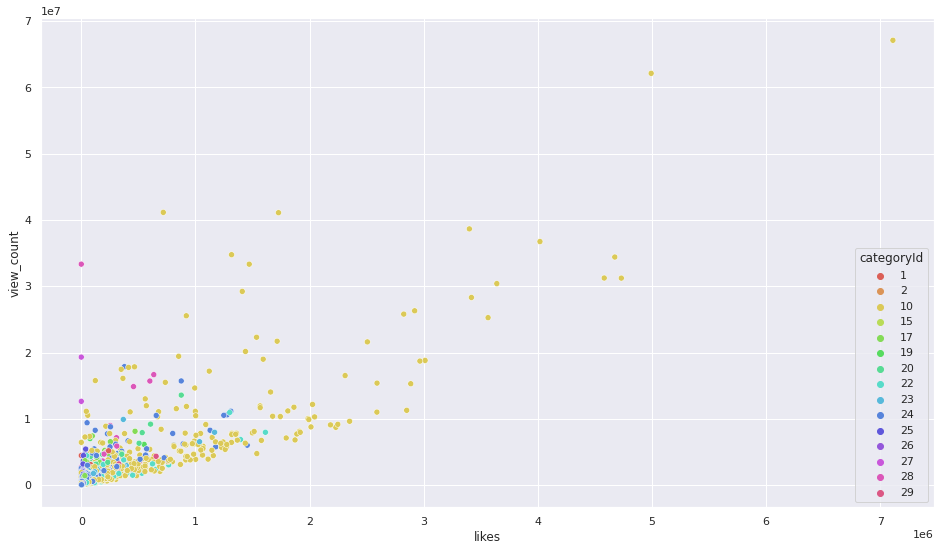

In [24]:
sns.scatterplot(x="likes", y="view_count",data=KR_2021_nodup, hue="categoryId", palette=color)

In [25]:
trending_continue = KR_data["video_id"].value_counts()
trending_continue[trending_continue>=20]
KR_data[KR_data["video_id"] == "JoR9u44dNjI"].iloc[0]

video_id                                                   JoR9u44dNjI
title                대한민국 VS 투르크메니스탄 : FIFA 카타르 월드컵 2차 예선 하이라이트 - 2...
publishedAt                                       2021-06-05T15:15:01Z
channelId                                     UCpjOmwiy88a9EV3Rv8ukJgw
channelTitle                                         KFATV_한국 축구 국가대표팀
categoryId                                                          17
trending_date                                     2021-06-06T00:00:00Z
tags                 축구|대한축구협회|KFATV|축구국가대표팀|벤투호|손흥민|황의조|황희찬|권창훈|정우...
view_count                                                     1414938
likes                                                            11103
dislikes                                                           582
comment_count                                                     8396
thumbnail_link          https://i.ytimg.com/vi/JoR9u44dNjI/default.jpg
comments_disabled                                                False
rating

In [26]:
trending_continue

JoR9u44dNjI    24
BhxadmfbFkg    24
6cZfUAdTe9Y    23
fANsFnkaX-U    23
fQwkO_pjMP4    23
               ..
fbjL0A-GQgs     1
7pnnoHjjr2c     1
szj8w-5nqE4     1
BqXRip22qbM     1
Pg0rQG05gmY     1
Name: video_id, Length: 13328, dtype: int64

In [27]:
Rating_2020.describe()

,categoryId,view_count,likes,dislikes,comment_count,ratio
count,4187.000000,4.187000e+03,4.187000e+03,4187.000000,4.187000e+03,4187.000000
mean,20.163363,7.658105e+05,5.732139e+04,939.039885,6.854473e+03,89.020050
std,6.863773,2.514516e+06,2.790841e+05,9458.069995,6.533524e+04,130.530829
min,1.000000,1.522500e+04,7.000000e+01,2.000000,0.000000e+00,0.151463
25%,17.000000,1.339070e+05,3.241500e+03,73.000000,3.925000e+02,26.862347
50%,24.000000,2.985070e+05,6.954000e+03,148.000000,9.980000e+02,47.416149
75%,24.000000,6.785585e+05,1.787150e+04,336.500000,2.478500e+03,88.514310
max,29.000000,7.680503e+07,7.046843e+06,405428.000000,2.314262e+06,1326.428571


In [28]:
sorted(KR_2021["categoryId"].unique())

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29]

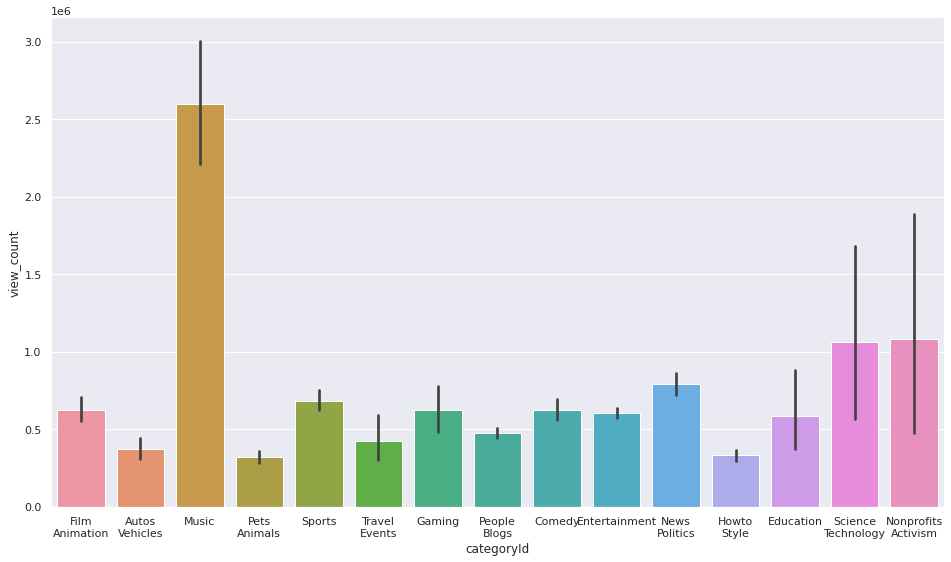

In [29]:
g = sns.barplot(x = "categoryId", y = "view_count", data=KR_2021_nodup)
xticks = list(map(lambda x:KR_id.loc[x].values[0], sorted(KR_2021_nodup["categoryId"].unique())))
g.set_xticklabels(xticks);